# Semestral work for USU
### by Filip Stehlík


https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay?datasetId=2285093&sortBy=voteCount  
Airport delay dataset.
Gett best score.

##### Imports

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer # tri druhy skalovani
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # pro rozdeleni  dat
from sklearn.model_selection import KFold # pouziti cross validace
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
import catboost as cb
from sklearn import tree


##### Data load

In [4]:
df = pd.read_csv("airlines.csv")

##### INFO

In [4]:
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
col_names = df.columns
#print(col_names)

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0
(539383, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8

##### Exploring dataset

In [5]:
df['Delay'].value_counts()


0    299119
1    240264
Name: Delay, dtype: int64

In [6]:
df['AirportFrom'].nunique()

293

In [7]:
df['AirportTo'].nunique()

293

In [8]:
df['AirportTo'].unique()

array(['IAH', 'CLT', 'DFW', 'SEA', 'MSP', 'DTW', 'ORD', 'ATL', 'PDX',
       'JFK', 'SLC', 'HNL', 'PHX', 'MCO', 'OGG', 'LAX', 'KOA', 'ITO',
       'SFO', 'MIA', 'IAD', 'SMF', 'PHL', 'LIH', 'DEN', 'LGA', 'MEM',
       'CVG', 'YUM', 'CWA', 'MKE', 'BQN', 'FAI', 'LAS', 'ANC', 'BOS',
       'LGB', 'FLL', 'SJU', 'EWR', 'DCA', 'BWI', 'RDU', 'MCI', 'TYS',
       'SAN', 'ONT', 'OAK', 'MDW', 'BNA', 'DAL', 'CLE', 'JAX', 'JNU',
       'RNO', 'ELP', 'SAT', 'OTZ', 'MBS', 'BDL', 'STL', 'HOU', 'AUS',
       'SNA', 'SJC', 'LIT', 'TUS', 'TUL', 'CMH', 'LAN', 'IND', 'AMA',
       'CRP', 'PIT', 'RKS', 'FWA', 'TPA', 'PBI', 'JAN', 'DSM', 'ADQ',
       'GRB', 'PVD', 'ABQ', 'SDF', 'RSW', 'MSY', 'BUR', 'BOI', 'TLH',
       'BHM', 'ACV', 'ORF', 'BET', 'KTN', 'RIC', 'SRQ', 'BTR', 'XNA',
       'MHT', 'GRR', 'SBN', 'SBA', 'ROA', 'CID', 'GPT', 'MFR', 'SGU',
       'HPN', 'OMA', 'OTH', 'GSP', 'LMT', 'BUF', 'MSN', 'BFL', 'CAE',
       'HRL', 'OKC', 'SYR', 'COS', 'BTV', 'CDC', 'SCC', 'DAY', 'SJT',
       'TVC', 'ROC',

In [9]:
df['AirportTo'].value_counts()

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

In [10]:
df['Airline'].nunique()

18

In [11]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [12]:
df['Flight'].nunique()

6585

In [13]:
df['Flight'].value_counts()

16      420
5       407
9       401
8       396
62      364
       ... 
7814      1
3573      1
4385      1
3292      1
6969      1
Name: Flight, Length: 6585, dtype: int64

In [6]:
import plotly.express as px
px.imshow(df.corr(),title="Correlation grapf")

C:\Users\HP GAMING\AppData\Local\Temp\ipykernel_8608\2836927623.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': array(['id', 'Flight', 'DayOfWeek', 'Time', 'Length', 'Delay'], dtype=object),
              'xaxis': 'x',
              'y': array(['id', 'Flight', 'DayOfWeek', 'Time', 'Length', 'Delay'], dtype=object),
              'yaxis': 'y',
              'z': array([[ 1.00000000e+00, -6.15553082e-03, -5.54738258e-02,  2.91559843e-02,
                            2.07811762e-02,  1.39761727e-01],
                          [-6.15553082e-03,  1.00000000e+00,  4.16281243e-04, -5.74968155e-03,
                           -3.41481075e-01, -4.61746108e-02],
                          [-5.54738258e-02,  4.16281243e-04,  1.00000000e+00,  1.27341326e-03,
                            1.33971012e-02, -2.61992853e-02],
                          [ 2.91559843e-02, -5.74968155e-03,  1.27341326e-03,  1.00000000e+00,
                           -2.06119928e-02,  1.50453775e-01],
                          [ 2.07811762e-02, -3.41481075e-01,  1.33971012e-02, -2.06119928e-02,
                            1.00000000e+00,  4.04894716e-02],
                          [ 1.39761727e-01, -4.61746108e-02, -2.61992853e-02,  1.50453775e-01,
                            4.04894716e-02,  1.00000000e+00]])}],
    'layout': {'coloraxis': {'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'template': '...',
               'title': {'text': 'Correlation grapf'},
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

##### Quick thoughts
- airline onehot
- TargetEncoder????
    - redukce
    - random projection
    - word embedding

- Everything else feels like label
- idk to do with flight

##### Preprocessing

In [8]:
X = df.drop(['Delay'], axis=1)

y = preprocessing.LabelEncoder().fit_transform(df['Delay'])

In [9]:
one_hot = pd.get_dummies(X['Airline'],drop_first=True)
X = X.drop('Airline',axis = 1)
X = X.join(one_hot)

X.head()

,id,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,AA,AS,B6,...,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
0,1,269,SFO,IAH,3,15,205,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1558,PHX,CLT,3,15,222,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2400,LAX,DFW,3,20,165,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2466,SFO,DFW,3,20,195,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,108,ANC,SEA,3,30,202,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X['AirportFrom'] = preprocessing.LabelEncoder().fit_transform(X['AirportFrom']) 
X['AirportTo'] = preprocessing.LabelEncoder().fit_transform(X['AirportTo'])
X.head() 

,id,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,AA,AS,B6,...,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
0,1,269,253,135,3,15,205,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1558,217,60,3,15,222,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,2400,154,80,3,20,165,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2466,253,80,3,20,195,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,108,14,252,3,30,202,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##### Training

In [30]:
# validace modelu
seed = 420
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

#Baseline dummy
pipe_sc_dummy = Pipeline([('scaler', StandardScaler()),('classifier', DummyClassifier(strategy="most_frequent"))])

pipe_sc_lr = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression())])
pipe_mm_rf = Pipeline([('scaler', MinMaxScaler()),('classifier', RandomForestClassifier(n_estimators=200))])
pipe_mm_knn5 = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=5))])
pipe_mm_knn7 = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier(n_neighbors=7))])
pipe_sc_svc = Pipeline([('scaler', StandardScaler()),('classifier', SVC(gamma='auto'))])

pipe_sc_dtree = Pipeline([('scaler', StandardScaler()),('classifier', tree.DecisionTreeClassifier())])
pipe_mm_dtree = Pipeline([('scaler', MinMaxScaler()),('classifier', tree.DecisionTreeClassifier())])

pipe_mm_rf = Pipeline([('scaler', MinMaxScaler()),('classifier', RandomForestClassifier(n_estimators=500))])
pipe_sc_rf = Pipeline([('scaler', StandardScaler()),('classifier', RandomForestClassifier(n_estimators=500,min_samples_split=3,min_samples_leaf=3))])

pipe_sc_cat = Pipeline([('scaler', StandardScaler()),('classifier', cb.CatBoostClassifier(random_state=seed, verbose = 0))])
pipe_mm_cat = Pipeline([('scaler', MinMaxScaler()),('classifier', cb.CatBoostClassifier(random_state=seed, verbose = 0))])

In [24]:
# validace modelu
seed = 420
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

#pipes = {"pipe_sc_lr":pipe_sc_lr, "pipe_sc_knn7":pipe_mm_knn7,"pipe_mm_rf":pipe_mm_rf,"pipe_mm_knn5":pipe_mm_knn5,"pipe_sc_svc":pipe_sc_svc,"dummy":pipe_sc_dummy}
pipes = {"pipe_sc_lr":pipe_sc_lr,"pipe_mm_knn5":pipe_mm_knn5,"dummy":pipe_sc_dummy}

In [19]:
results = { pipe_name: [] for pipe_name in pipes.keys()}
# rozdelime si data na trenovaci, ktere budeme delit dale, a testovaci, na kterych pak ukazeme chovani
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=seed) # testovaci data zatim nepouzijeme
# trenovaci mnozinu budeme delit dale na 5 podmnozin
kf = KFold(n_splits=5, shuffle=True)
print("start")
for train_index, test_index in kf.split(X_tr, y_tr): # vraci dvojici poli testovacich a trenovacich indexu
  # rozdel si data na trenovaci a na data, na kterych bude ohodnocen klasifikator
  X_fold_tr = X_tr.values[train_index]
  y_fold_tr = y_tr[train_index]
  X_fold_test = X_tr.values[test_index]
  y_fold_test = y_tr[test_index]
  for k, pipe in pipes.items(): # pro kazdou pipe, delej
    pipe.fit(X_fold_tr, y_fold_tr) # nauc
    results[k].append(pipe.score(X_fold_test,y_fold_test)) # uloz si accuracy
    print(train_index,k)
#udelej si dataframe pro zhodnoceni
print("progress6")
results = pd.DataFrame(data = results)

print(results) # tiskni za jednoltive foldy uspesnost klasifikatoru
print(results.mean()) # tiskni prumer

start
[     1      2      5 ... 431502 431504 431505] pipe_sc_lr
[     1      2      5 ... 431502 431504 431505] pipe_mm_knn5
[     1      2      5 ... 431502 431504 431505] dummy
[     0      1      2 ... 431503 431504 431505] pipe_sc_lr
[     0      1      2 ... 431503 431504 431505] pipe_mm_knn5
[     0      1      2 ... 431503 431504 431505] dummy
[     0      1      2 ... 431503 431504 431505] pipe_sc_lr
[     0      1      2 ... 431503 431504 431505] pipe_mm_knn5
[     0      1      2 ... 431503 431504 431505] dummy
[     0      2      3 ... 431502 431503 431504] pipe_sc_lr
[     0      2      3 ... 431502 431503 431504] pipe_mm_knn5
[     0      2      3 ... 431502 431503 431504] dummy
[     0      1      3 ... 431502 431503 431505] pipe_sc_lr
[     0      1      3 ... 431502 431503 431505] pipe_mm_knn5
[     0      1      3 ... 431502 431503 431505] dummy
progress6
   pipe_sc_lr  pipe_mm_knn5     dummy
0    0.643821      0.656763  0.557113
1    0.641453      0.652159  0.554513


This was result of first try, baseline is 0.55.  
Logistic regresion mm fielded 0.64.
Knn5 sc fielded 0.65.

Lets try other methods.



In [31]:
# validace modelu
seed = 420
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

#pipes = {"pipe_sc_lr":pipe_sc_lr, "pipe_sc_knn7":pipe_mm_knn7,"pipe_mm_rf":pipe_mm_rf,"pipe_mm_knn5":pipe_mm_knn5,"pipe_sc_svc":pipe_sc_svc,"dummy":pipe_sc_dummy}
pipes = {"pipe_mm_cat":pipe_mm_cat, "pipe_mm_knn7":pipe_mm_knn7, "pipe_mm_rf":pipe_mm_rf,"pipe_mm_dtree":pipe_mm_dtree}

In [32]:
results = { pipe_name: [] for pipe_name in pipes.keys()}
# rozdelime si data na trenovaci, ktere budeme delit dale, a testovaci, na kterych pak ukazeme chovani
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.2,random_state=seed) # testovaci data zatim nepouzijeme
# trenovaci mnozinu budeme delit dale na 5 podmnozin
kf = KFold(n_splits=5, shuffle=True)
print("start")
for train_index, test_index in kf.split(X_tr, y_tr): # vraci dvojici poli testovacich a trenovacich indexu
  # rozdel si data na trenovaci a na data, na kterych bude ohodnocen klasifikator
  X_fold_tr = X_tr.values[train_index]
  y_fold_tr = y_tr[train_index]
  X_fold_test = X_tr.values[test_index]
  y_fold_test = y_tr[test_index]
  for k, pipe in pipes.items(): # pro kazdou pipe, delej
    pipe.fit(X_fold_tr, y_fold_tr) # nauc
    results[k].append(pipe.score(X_fold_test,y_fold_test)) # uloz si accuracy
    print(train_index,k)
#udelej si dataframe pro zhodnoceni
print("progress6")
results = pd.DataFrame(data = results)

print(results) # tiskni za jednoltive foldy uspesnost klasifikatoru
print(results.mean()) # tiskni prumer

start
[     0      2      4 ... 431503 431504 431505] pipe_mm_cat
[     0      2      4 ... 431503 431504 431505] pipe_mm_knn7
[     0      2      4 ... 431503 431504 431505] pipe_mm_rf
[     0      2      4 ... 431503 431504 431505] pipe_mm_dtree
[     0      1      3 ... 431502 431504 431505] pipe_mm_cat
[     0      1      3 ... 431502 431504 431505] pipe_mm_knn7
[     0      1      3 ... 431502 431504 431505] pipe_mm_rf
[     0      1      3 ... 431502 431504 431505] pipe_mm_dtree
[     0      1      2 ... 431503 431504 431505] pipe_mm_cat
[     0      1      2 ... 431503 431504 431505] pipe_mm_knn7
[     0      1      2 ... 431503 431504 431505] pipe_mm_rf
[     0      1      2 ... 431503 431504 431505] pipe_mm_dtree
[     0      1      2 ... 431502 431503 431505] pipe_mm_cat
[     0      1      2 ... 431502 431503 431505] pipe_mm_knn7
[     0      1      2 ... 431502 431503 431505] pipe_mm_rf
[     0      1      2 ... 431502 431503 431505] pipe_mm_dtree
[     1      2      3 ... 

RF getting good score was my bet for this dataset, where there will be big differences in delay depending on airport, flight from and flight to that are categorical  
Cat of course beating everything.
while waiting i checked other results on net. 0.69 is number to beat so i am happy.  

##### Lets try neural networks for lulz

In [51]:
# Combining the processed data
print(X.shape)
X_n = X
scaler = MinMaxScaler()

X_n = scaler.fit_transform(X_n)

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.1, random_state=420)

# Create the neural network model
neural_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape = (24,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

neural_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = neural_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


(539383, 24)
Epoch 1/20
15171/15171 [==============================] - 36s 2ms/step - loss: 0.6201 - accuracy: 0.6524 - val_loss: 0.6125 - val_accuracy: 0.6612
Epoch 2/20
15171/15171 [==============================] - 35s 2ms/step - loss: 0.6102 - accuracy: 0.6619 - val_loss: 0.6094 - val_accuracy: 0.6629
Epoch 3/20
15171/15171 [==============================] - 35s 2ms/step - loss: 0.6060 - accuracy: 0.6662 - val_loss: 0.6074 - val_accuracy: 0.6683
Epoch 4/20
15171/15171 [==============================] - 35s 2ms/step - loss: 0.6035 - accuracy: 0.6688 - val_loss: 0.6041 - val_accuracy: 0.6676
Epoch 5/20
15171/15171 [==============================] - 34s 2ms/step - loss: 0.6018 - accuracy: 0.6703 - val_loss: 0.6001 - val_accuracy: 0.6709
Epoch 6/20
15171/15171 [==============================] - 34s 2ms/step - loss: 0.6005 - accuracy: 0.6711 - val_loss: 0.6001 - val_accuracy: 0.6709
Epoch 7/20
15171/15171 [==============================] - 35s 2ms/step - loss: 0.5990 - accuracy: 0.6726 

Graphscvery much borrowed

1686/1686 [==============================] - 3s 2ms/step - loss: 0.5947 - accuracy: 0.6769
Test Accuracy: 67.69%


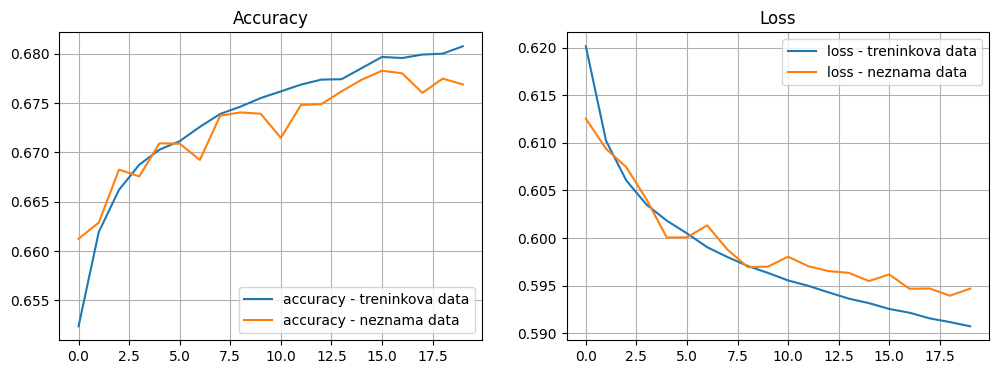

In [55]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['accuracy'], label='accuracy - treninkova data')
axis[0].plot(history.history['val_accuracy'], label='accuracy - neznama data')
axis[0].grid()
axis[0].set_title('Accuracy')
axis[0].legend()

axis[1].plot(history.history['loss'], label='loss - treninkova data')
axis[1].plot(history.history['val_loss'], label='loss - neznama data')
axis[1].grid()
axis[1].set_title('Loss')
axis[1].legend()

loss, accuracy = neural_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


TRY 2

In [16]:
# Combining the processed data
print(X.shape)
X_n = X
scaler = MinMaxScaler()

X_n = scaler.fit_transform(X_n)

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.1, random_state=420)

# Create the neural network model
neural_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            256, activation="relu", input_shape=[24]
        ),
        tf.keras.layers.Dense(515, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
neural_model.summary()
neural_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = neural_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))




(539383, 24)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               6400      
                                                                 
 dense_9 (Dense)             (None, 515)               132355    
                                                                 
 dropout_4 (Dropout)         (None, 515)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                25800     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 164,606
Trainable params: 1

1686/1686 [==============================] - 3s 2ms/step - loss: 0.5976 - accuracy: 0.6755
Test Accuracy: 67.55%


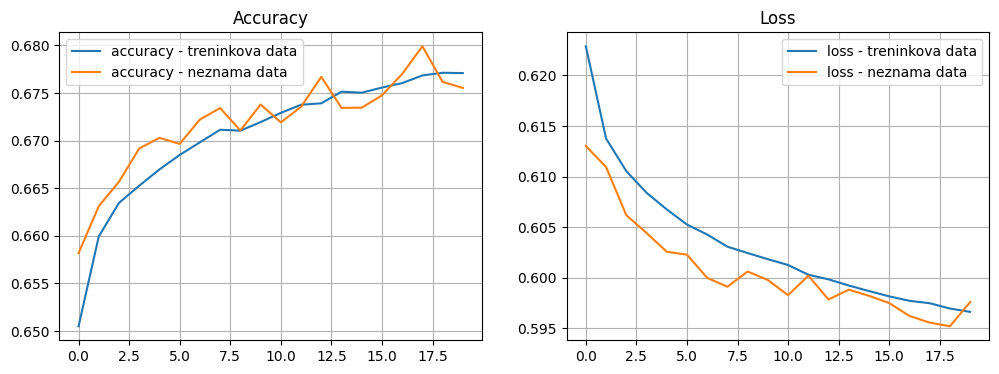

In [17]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['accuracy'], label='accuracy - treninkova data')
axis[0].plot(history.history['val_accuracy'], label='accuracy - neznama data')
axis[0].grid()
axis[0].set_title('Accuracy')
axis[0].legend()

axis[1].plot(history.history['loss'], label='loss - treninkova data')
axis[1].plot(history.history['val_loss'], label='loss - neznama data')
axis[1].grid()
axis[1].set_title('Loss')
axis[1].legend()

loss, accuracy = neural_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [19]:
predictions =(neural_model.predict(X_test)>0.5).astype("int32")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)

1686/1686 [==============================] - 3s 2ms/step


0.675540888781772

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73     30189
           1       0.66      0.53      0.59     23750

    accuracy                           0.68     53939
   macro avg       0.67      0.66      0.66     53939
weighted avg       0.67      0.68      0.67     53939

